In [1]:
!pip install alpha_vantage

In [2]:
%matplotlib notebook

In [3]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
import requests
from config import api_key

In [4]:
# Your key here
key = api_key
# Chose your output format, or default to JSON (python dict)
ts = TimeSeries(key, output_format='pandas')
ti = TechIndicators(key)

# Get the data, returns a tuple
# Get data for Boeing (BA) stock
df, meta_df = ts.get_daily(symbol='cnk', outputsize = "full")

df.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-05-11,14.75,14.7800,13.4459,13.58,4176627.0
2020-05-08,13.91,14.1300,13.5500,14.13,3418178.0
2020-05-07,13.08,14.1600,12.9600,13.61,3506987.0
2020-05-06,13.32,13.4900,12.6400,12.79,3009263.0
2020-05-05,14.29,14.5081,13.1800,13.24,3884687.0


In [5]:
meta_df

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'cnk',
 '3. Last Refreshed': '2020-05-11',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [76]:
# Get data for Boeing (BA) stock
ticker = "ebay"
df, meta_df = ts.get_daily(symbol=str(ticker), outputsize = "full")

# Data cleaning
# Narrow the data to only get stock prices starting on this date
start_date = "2019-06-01"
stock=df[df.index >= start_date]

# Get the stock price on the first day of our range
stock = stock[["4. close"]]
start = stock["4. close"][-1]

# Calculate the %change between the stock price on first day and stock price of each day after
# Add %change data as a column called "change" in our dataframe
stock["change"] = stock.apply(lambda x:(x-start)/start)


# Get the company name given the ticker symbol
co = requests.get(f"https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords={ticker}&apikey={key}").json()
co_name = co["bestMatches"][0]["2. name"]

stock_jan=stock[stock.index>='2020-01-31']
stock_neg=stock_jan[stock_jan.change<0]
stock_pos=stock_jan[stock_jan.change>0]

# Visualization
fig, ax=plt.subplots(figsize=(10,4))
ax.fill_between(stock.index,stock.change, color='grey')
ax.fill_between(stock_jan.index, stock_jan.change, color='royalblue')
ax.fill_between(stock_jan.index,stock_jan.change,where=stock_jan.change<=0, color='gold')
# ax.set_facecolor('xkcd:salmon')
ax.set_facecolor('black')

ax.axvline(pd.to_datetime('2020-01-31'), color='w', linestyle=':', label = 'Jan 31 - WHO declares COVID-19 as a pandemic')
ax.axvline(pd.to_datetime('2020-03-13'), color='crimson', linestyle=':', label = 'Mar 13 - Trump declares a national emergency')
ax.axvline(pd.to_datetime('2020-03-23'), color='w', linestyle=':', label = 'Mar 23 - NYSE closed')
ax.axvline(pd.to_datetime('2020-03-27'), color='w', linestyle=':', label = 'Mar 27 - Trump signs stimulus package')
ax.axvline(pd.to_datetime('2020-04-16'), color='w', linestyle=':', label = 'Apr 16 - Trump issues guidlines to reopen')
ax.set_title(co_name)
ax.legend(loc='lower left')
ax.set_ylabel(f"% Change in Stock Price")
fig.savefig(f"../images/{co_name}.png")

In [84]:
def ticker_plot(ticker):
    df, meta_df = ts.get_daily(symbol=str(ticker), outputsize = "full")

    # Data cleaning
    # Narrow the data to only get stock prices starting on this date
    start_date = "2019-06-01"
    stock=df[df.index >= start_date]

    # Get the stock price on the first day of our range
    stock = stock[["4. close"]]
    start = stock["4. close"][-1]

    # Calculate the %change between the stock price on first day and stock price of each day after
    # Add %change data as a column called "change" in our dataframe
    stock["change"] = stock.apply(lambda x:(x-start)/start)


    # Get the company name given the ticker symbol
    co = requests.get(f"https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords={ticker}&apikey={key}").json()
    co_name = co["bestMatches"][0]["2. name"]

    stock_jan=stock[stock.index>='2020-01-31']
    stock_neg=stock_jan[stock_jan.change<0]
    stock_pos=stock_jan[stock_jan.change>0]

    # Visualization
    fig, ax=plt.subplots(figsize=(10,4))
    ax.fill_between(stock.index,stock.change, color='grey')
    ax.fill_between(stock_jan.index, stock_jan.change, color='royalblue')
    ax.fill_between(stock_jan.index,stock_jan.change,where=stock_jan.change<=0, color='gold')
    # ax.set_facecolor('xkcd:salmon')
    ax.set_facecolor('black')

    ax.axvline(pd.to_datetime('2020-01-31'), color='w', linestyle=':', label = 'Jan 31 - WHO declares COVID-19 as a pandemic')
    ax.axvline(pd.to_datetime('2020-03-13'), color='crimson', linestyle=':', label = 'Mar 13 - Trump declares a national emergency')
    ax.axvline(pd.to_datetime('2020-03-23'), color='w', linestyle=':', label = 'Mar 23 - NYSE closed')
    ax.axvline(pd.to_datetime('2020-03-27'), color='w', linestyle=':', label = 'Mar 27 - Trump signs stimulus package')
    ax.axvline(pd.to_datetime('2020-04-16'), color='w', linestyle=':', label = 'Apr 16 - Trump issues guidlines to reopen')
    ax.set_title(co_name)
    ax.legend(loc='lower left')
    ax.set_ylabel(f"% Change in Stock Price")
    fig.savefig(f"../images/{co_name}.png")

<IPython.core.display.Javascript object>


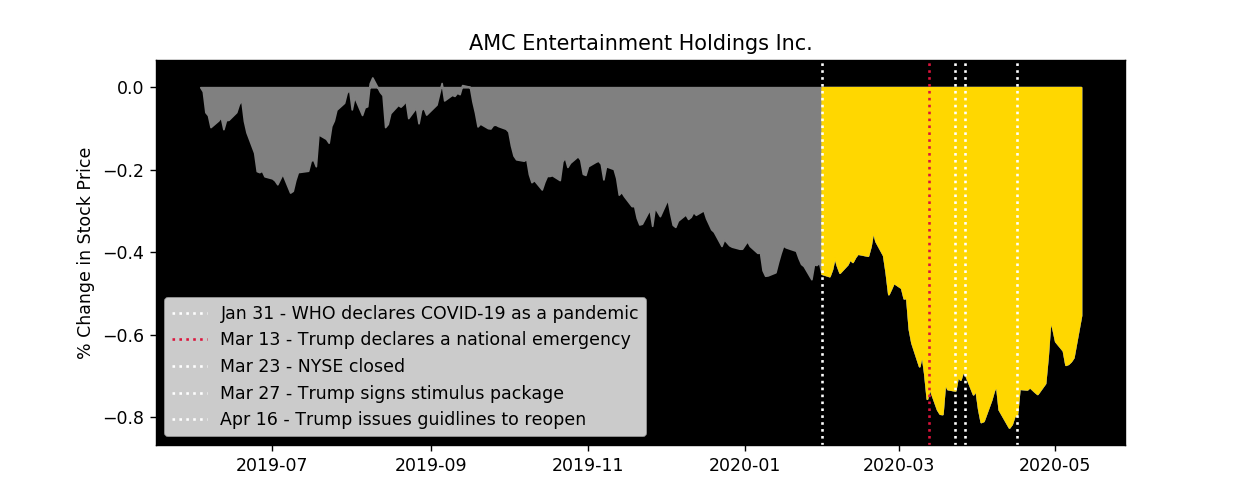

In [85]:
ticker_plot("amc")